# Linear Classifier
### Goal of Lesson
- Learn about Supervised Learning
- Explore how to use it for classification
- Understand Perceptron Classifier
- Use Perceptron as a linear classifier

 ## Supervised Learning
 - Given a dataset of input-output pairs, learn a function to map inputs to outputs
 - There are different tasks - but we start to focus on **Classification**
 
 
 ### Classification
 
 - Supervised learning task of learning a function mapping an input point to a descrete category

### Example
- Predict if it is going to rain or not
- We have historical data to train our model

| Date       | Humidity  | Pressure  | Rain      |
| :--------- |:---------:| ---------:| :---------|
| Jan. 1     | 93%       | 999.7     | Rain      |
| Jan. 2     | 49%       | 1015.5    | No Rain   |
| Jan. 3     | 79%       | 1031.1    | No Rain   |
| Jan. 4     | 65%       | 984.9     | Rain      |
| Jan. 5     | 90%       | 975.2     | Rain      |

- This is supervised learning as it has the label

### The task of Supervised Learning
- Simply explained, the task of from the example above, is to find a funcion $f$ as follows.

**Ideally**: $f(humidity, pressure)$

Examples:
- $f(93, 999.7) =$ Rain
- $f(49, 1015.5) =$ No Rain
- $f(79, 1031.1 =$ No Rain

**Goal**: Approximate the function $f$ - the approximation function is often denoted $h$

### Linear Classifier
- $x_1$: Humidity
- $x_2$: Pressure
- $h(x_1, x_2) = w_0 + w_1 x_1 + w_2 x_2$

### Differently
- Weight vector $w: (w_0, w_1, w_2)$
- Input vector $x: (1, x_1, x_2)$
- Function ([dot-product](https://en.wikipedia.org/wiki/Dot_product)): $x\cdot w: w_0 + w_1 x_1 + w_2 x_2$
- $h_w(x) = w\cdot x$

### Perceptron Classifier
- Is a linear algorithm that can be applied to binary classification

### Perceptron Learning Rule
- Given data point $x, y$ update each weight according to
    - $w_i = w_i + \alpha(y - h_w(x))\times x_i$
    - $w_i = w_i + \alpha($actual value - estimate$)\times x_i$
        - $\alpha$: learning rate

> #### Programming Notes:
> - Libraries used
>     - [**pandas**](https://pandas.pydata.org) - a data analysis and manipulation tool
>     - [**numpy**](http://numpy.org) - scientific computing with Python ([Lecture on NumPy](https://youtu.be/BpzpU8_j0-c))
>     - [**matplotlib**](http://matplotlib.org) - visualization with Python ([Lecture on **visualization**](https://youtu.be/htIh8YHh4xs))
>     - [**sklearn**](https://scikit-learn.org/stable/) - tools for predictive data analysis
> - Functionality and concepts used
>     - [**CSV**](https://en.wikipedia.org/wiki/Comma-separated_values) file ([Lecture on CSV](https://youtu.be/LEyojSOg4EI))
>     - [**read_csv()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) read a comma-separated values (csv) file into **pandas** DataFrame.
>     - **List Comprehension** to convert data ([Lecture on **List Comprehension**](https://youtu.be/vCYEvtfXdig)
>     - [**dropna()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) clean the **pandas** DataFrame
>     - [**train_test_split**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from [**sklearn**](https://scikit-learn.org/stable/)
>     - [**Perceptron**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to train (fit) the model
>     - [**metrics.accuracy_score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to get the accuracy of the predictions

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('files/weather.csv', parse_dates=True, index_col=0)

In [3]:
dataset.isna().sum()

MinTemp             3
MaxTemp             2
Rainfall            6
Evaporation        51
Sunshine           16
WindGustDir      1036
WindGustSpeed    1036
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        14
Humidity3pm        13
Pressure9am        20
Pressure3pm        19
Cloud9am          566
Cloud3pm          561
Temp9am             4
Temp3pm             4
RainToday           6
RISK_MM             0
RainTomorrow        0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
dataset = dataset[['Humidity3pm', 'Pressure3pm', 'RainTomorrow']].dropna()
X = dataset[['Humidity3pm', 'Pressure3pm']]
y = dataset['RainTomorrow']
y = np.array([0 if value == 'No' else 1 for value in y])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
from sklearn.linear_model import Perceptron
from sklearn import metrics

In [39]:
clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7729468599033816

In [40]:
sum(y == 0)/len(y)

0.7407071622846781

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

<IPython.core.display.Javascript object>


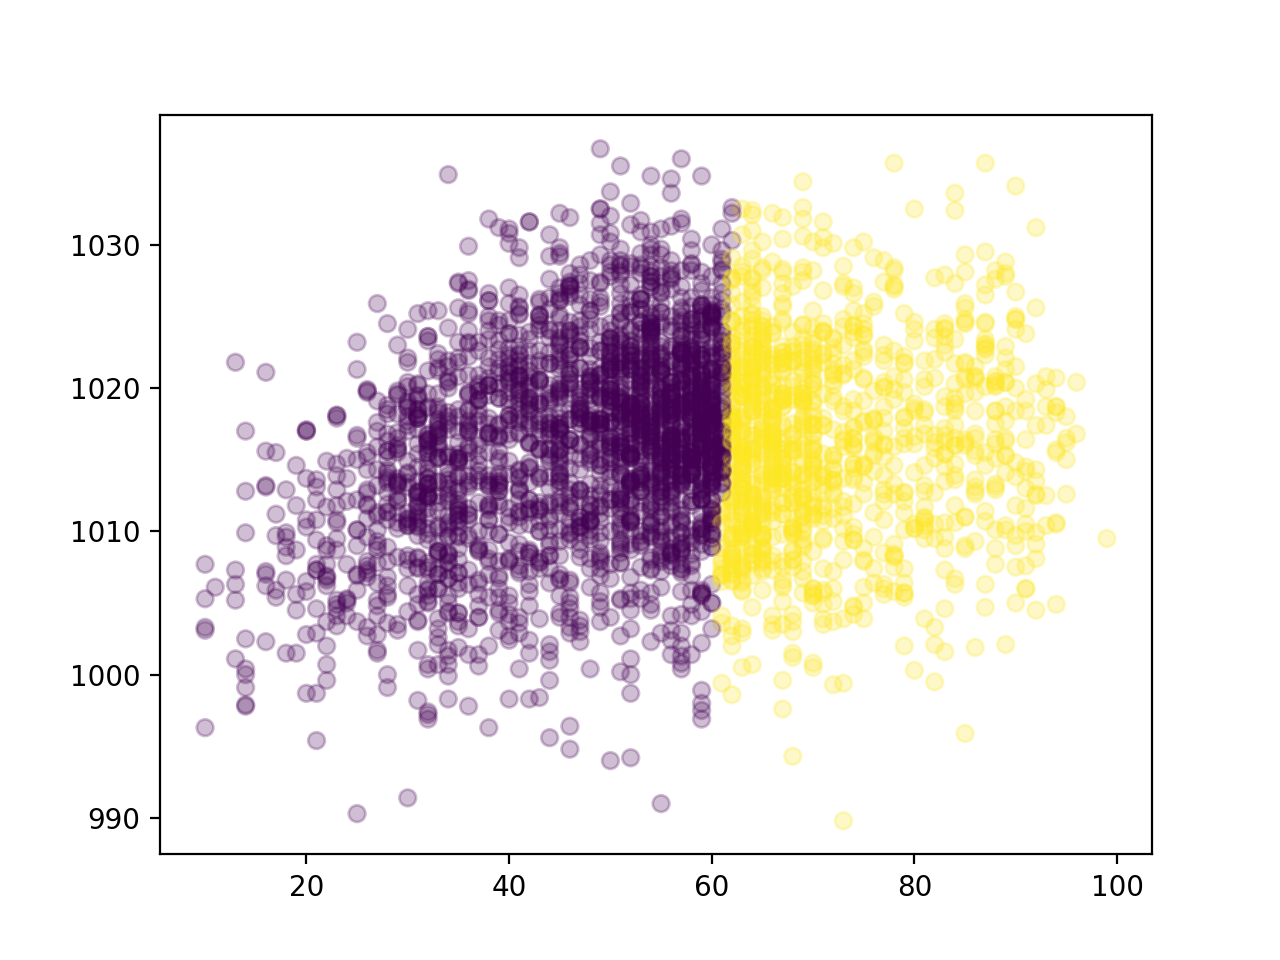

In [42]:
fig, ax = plt.subplots()

X_data = X.to_numpy()
y_all = clf.predict(X)

ax.scatter(x=X_data[:,0], y=X_data[:,1], c=y_all, alpha=.25)

In [27]:
y_all

array([1, 1, 1, ..., 1, 1, 1])

Further resources: https://machinelearningmastery.com/perceptron-algorithm-for-classification-in-python/